In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/3b8875f6d22515d9667583bcbe6c8474675c62ca/data_viz_website_2017.csv'
df = pd.read_csv(link, parse_dates = ['visit_date'])

In [2]:
import datetime as dt
df['Month'] = df['visit_date'].dt.month
df

,visit_date,time_spent_homepage_sec,clicked_article,clicked_like,clicked_share,Month
0,2017-01-01,41.413953,0,0,0,1
1,2017-01-01,64.894319,0,0,0,1
2,2017-01-01,48.745789,1,0,0,1
3,2017-01-01,59.620572,0,0,0,1
4,2017-01-01,56.219418,1,0,0,1
...,...,...,...,...,...,...
182495,2017-12-31,115.021266,0,1,0,12
182496,2017-12-31,100.900941,1,0,0,12
182497,2017-12-31,103.644303,0,1,0,12
182498,2017-12-31,88.238283,0,0,0,12


(0.0, 1.0)

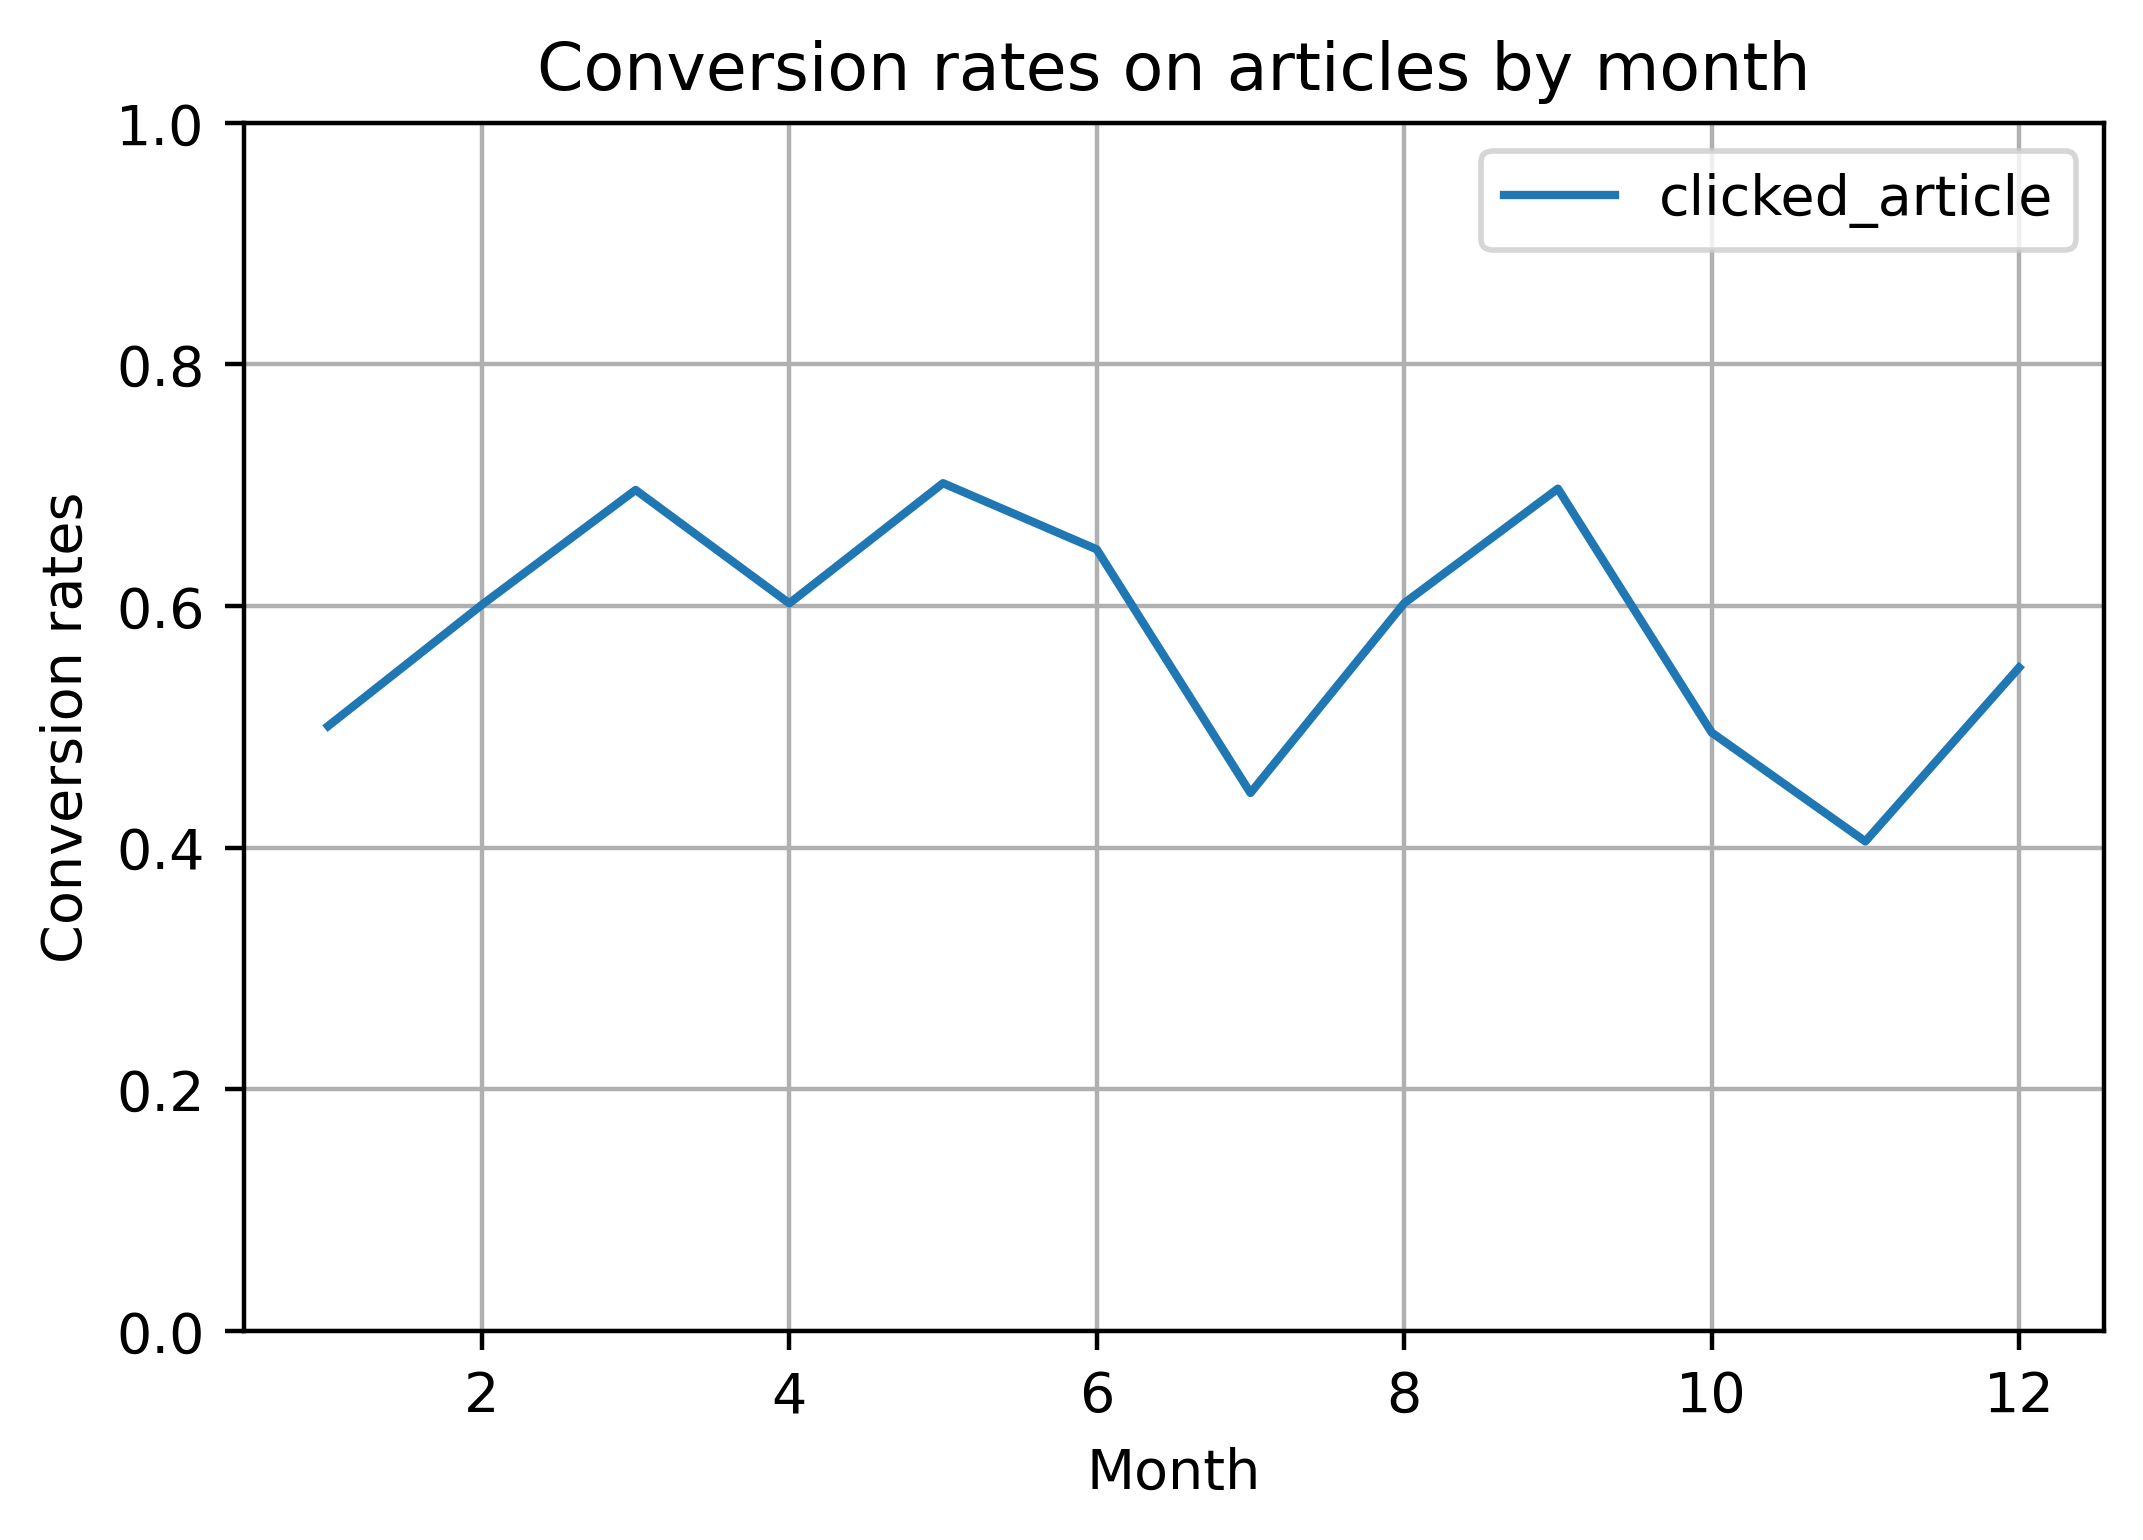

In [3]:
conv_rate_article= pd.DataFrame(df.groupby('Month')['clicked_article'].mean())
conv_rate_article.plot()
plt.ylabel('Conversion rates')
plt.title('Conversion rates on articles by month')
plt.grid(True)
plt.ylim([0,1])

(0.0, 1.0)

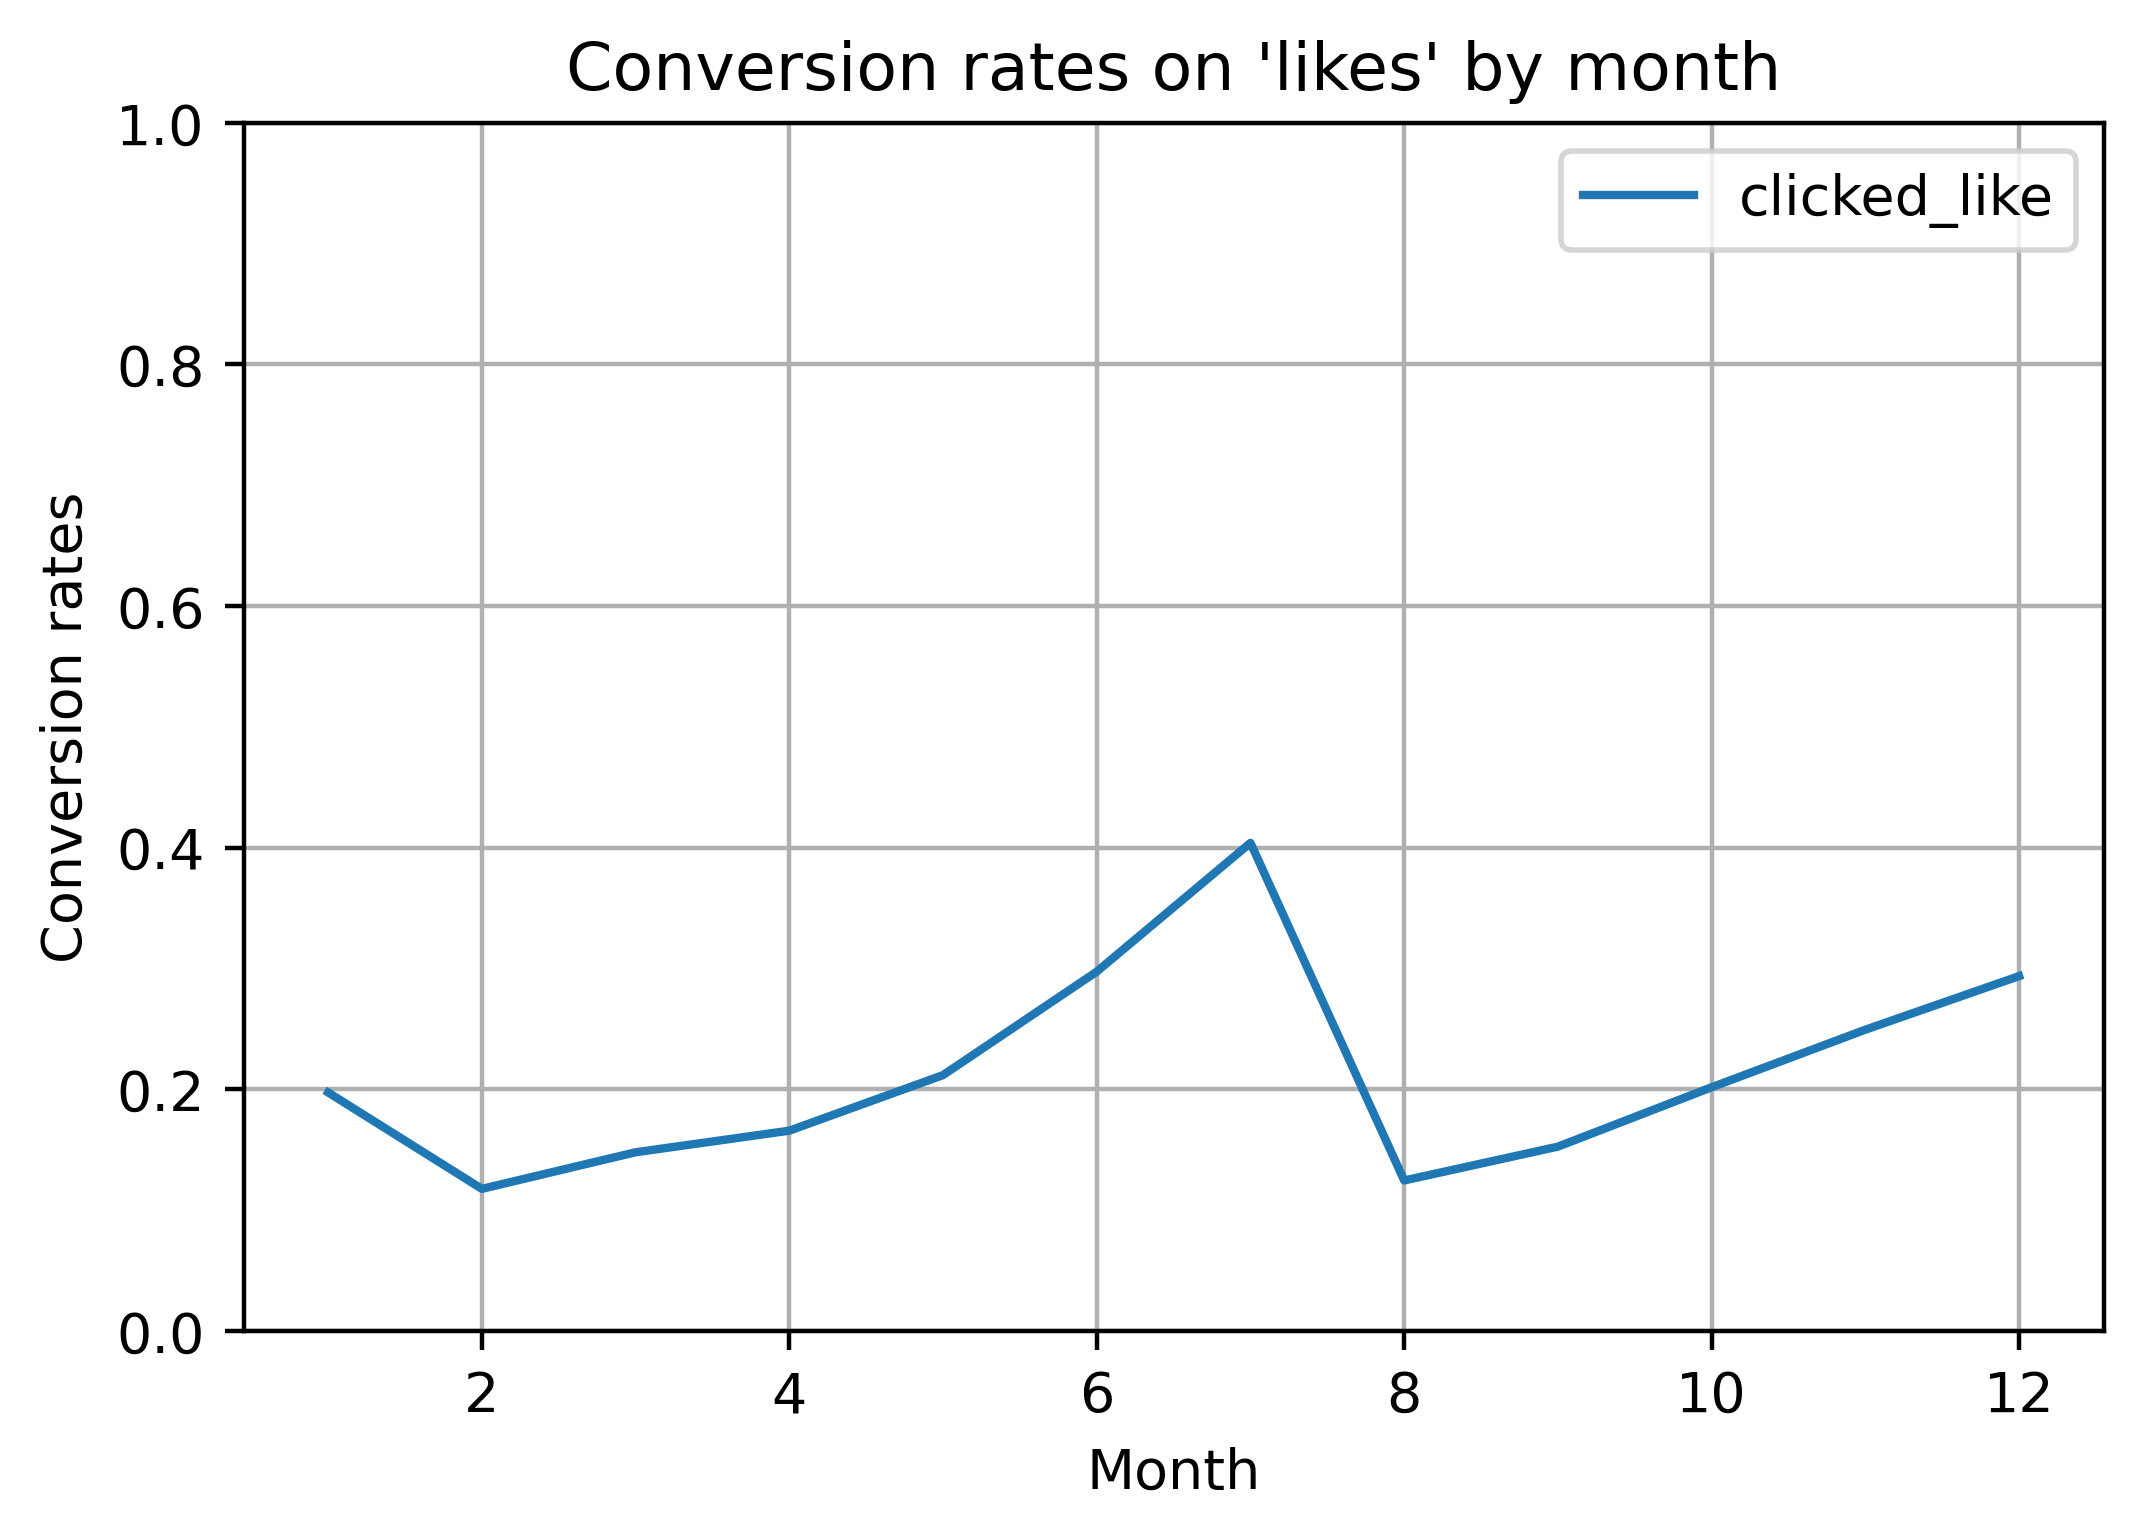

In [4]:
conv_rate_like = pd.DataFrame(df.groupby('Month')['clicked_like'].mean())
conv_rate_like.plot()
plt.ylabel('Conversion rates')
plt.title("Conversion rates on 'likes' by month")
plt.grid(True)
plt.ylim([0,1])

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(0.0, 1.0)

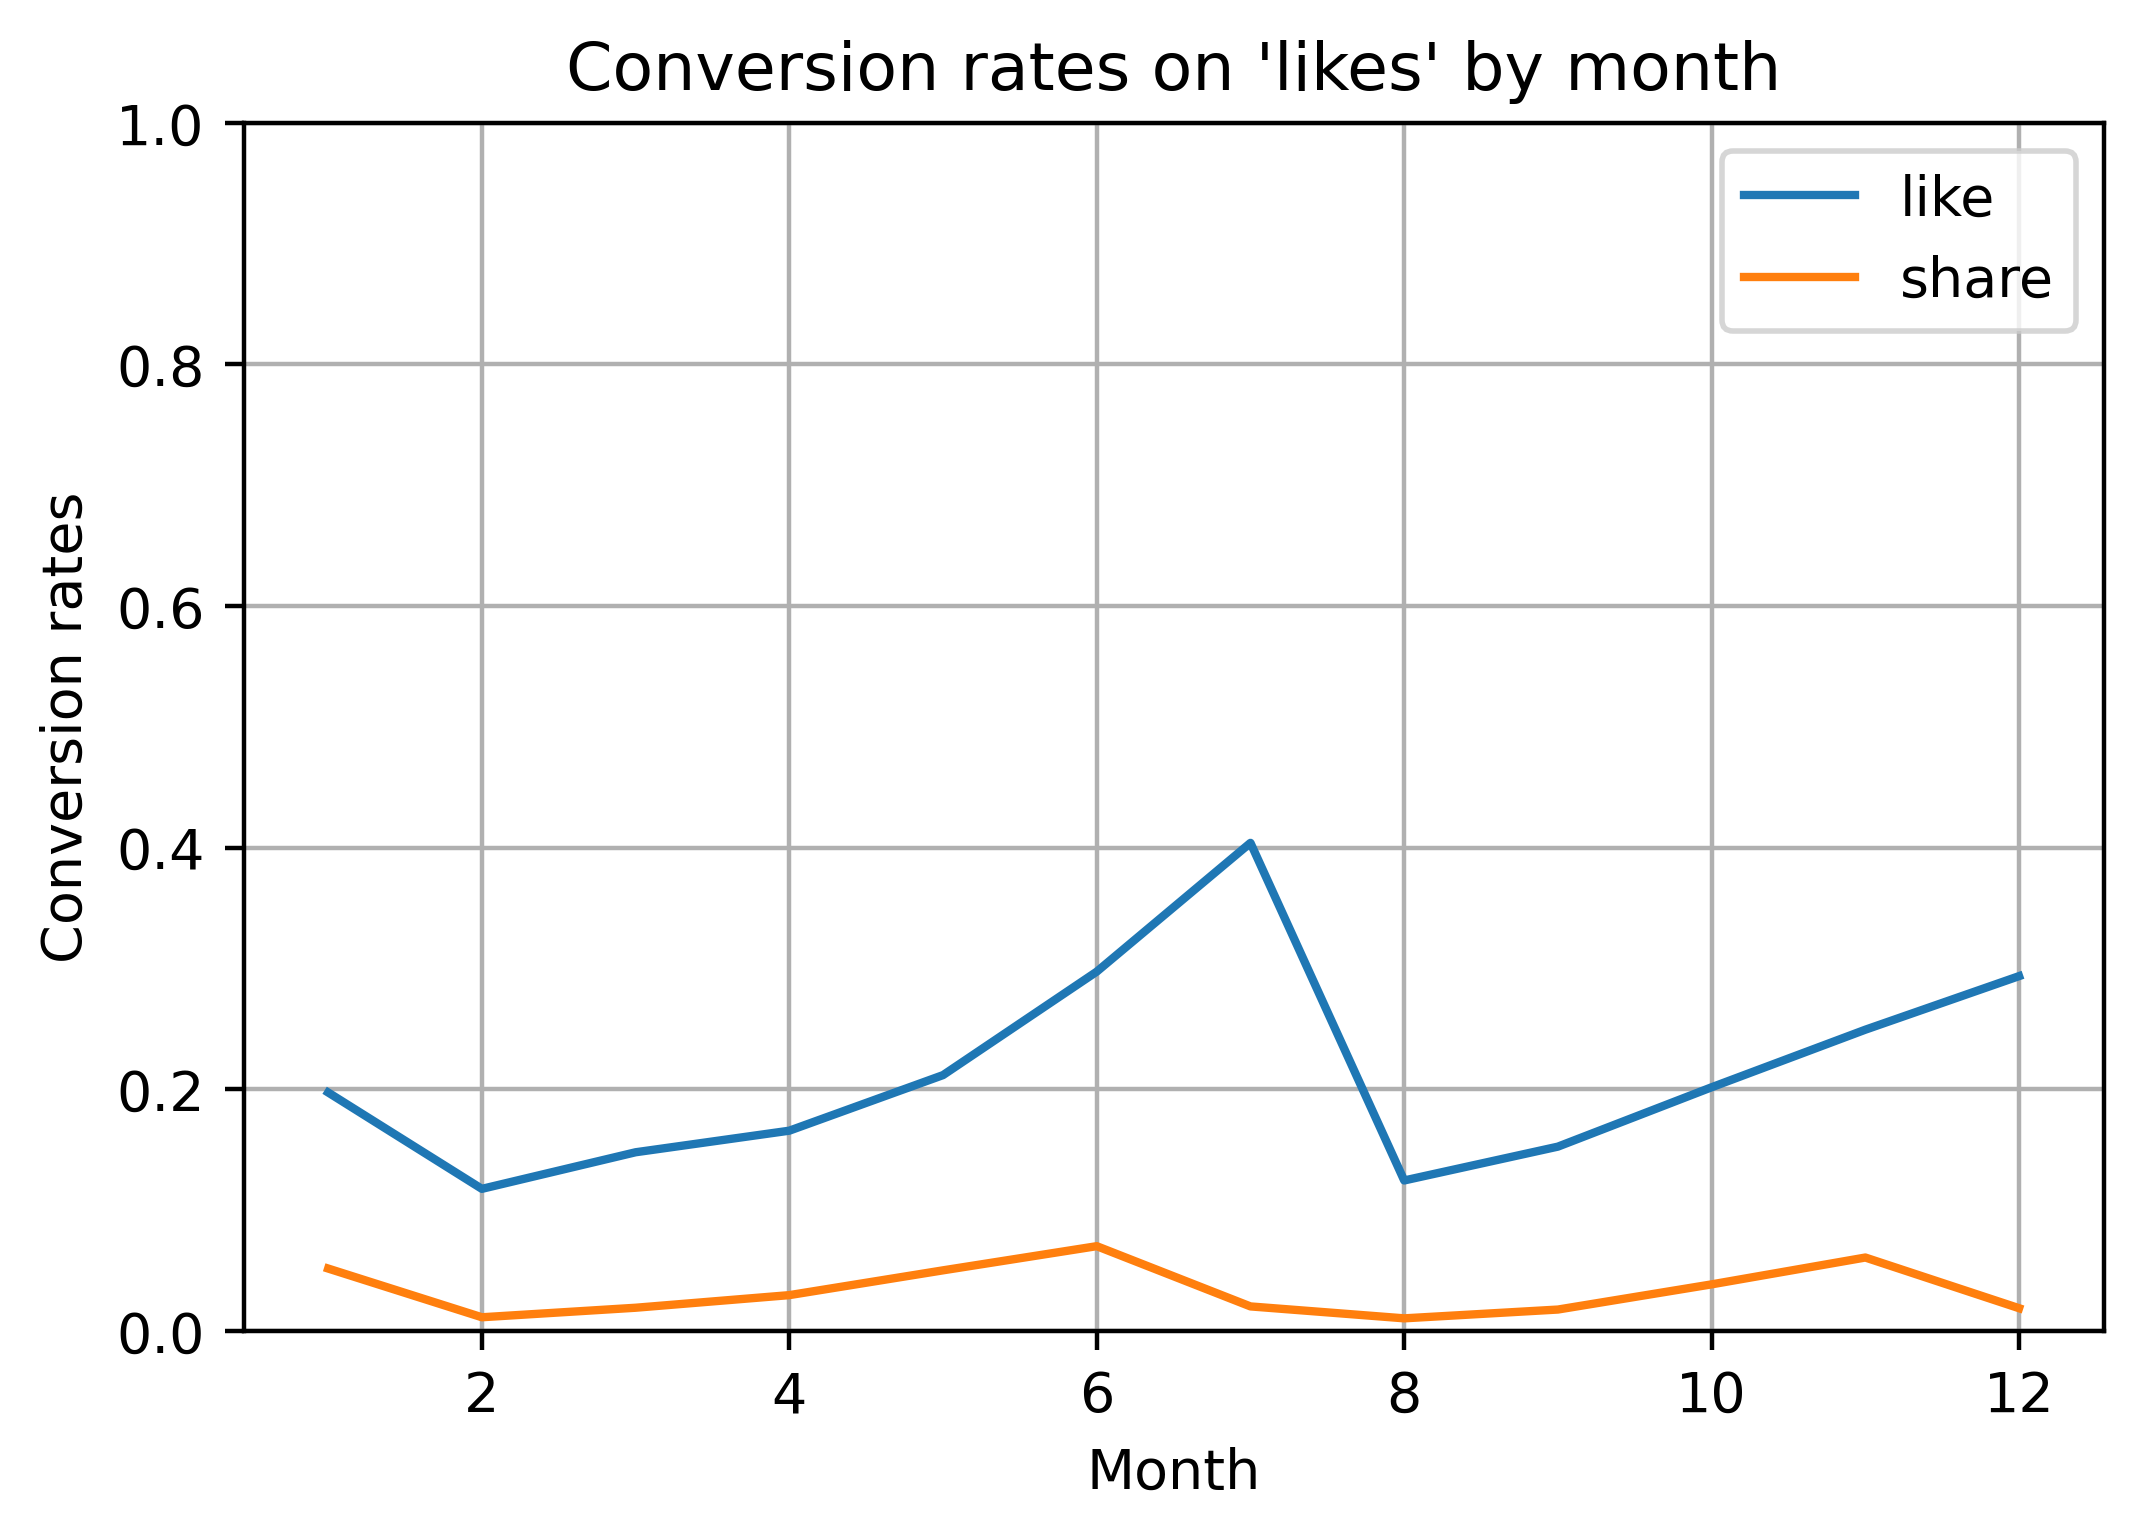

In [5]:
conv_rate_like = pd.DataFrame(df.groupby('Month')['clicked_like', 'clicked_share'].mean())
conv_rate_like.plot()
plt.ylabel('Conversion rates')
plt.title("Conversion rates on 'likes' by month")
plt.grid(True)
plt.legend(labels=['like', 'share'])
plt.ylim([0,1])

In [6]:
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/daea5e76b1db0de801a942b54092c8022525b2ca/data_viz_website_2018_01.csv'
df = pd.read_csv(link, parse_dates=True)

In [7]:
df.head()

,visit_date,condition,time_spent_homepage_sec,clicked_article,clicked_like,clicked_share
0,2018-01-01,A1,57.879667,1,1,0
1,2018-01-01,A1,59.241249,1,0,0
2,2018-01-01,A1,59.683047,1,0,0
3,2018-01-01,A1,58.264991,1,1,0
4,2018-01-01,A1,58.814206,1,0,0


In [8]:
viz_website_2018_01_sum = df.groupby(['condition'])['clicked_article','clicked_like','clicked_share'].mean()

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


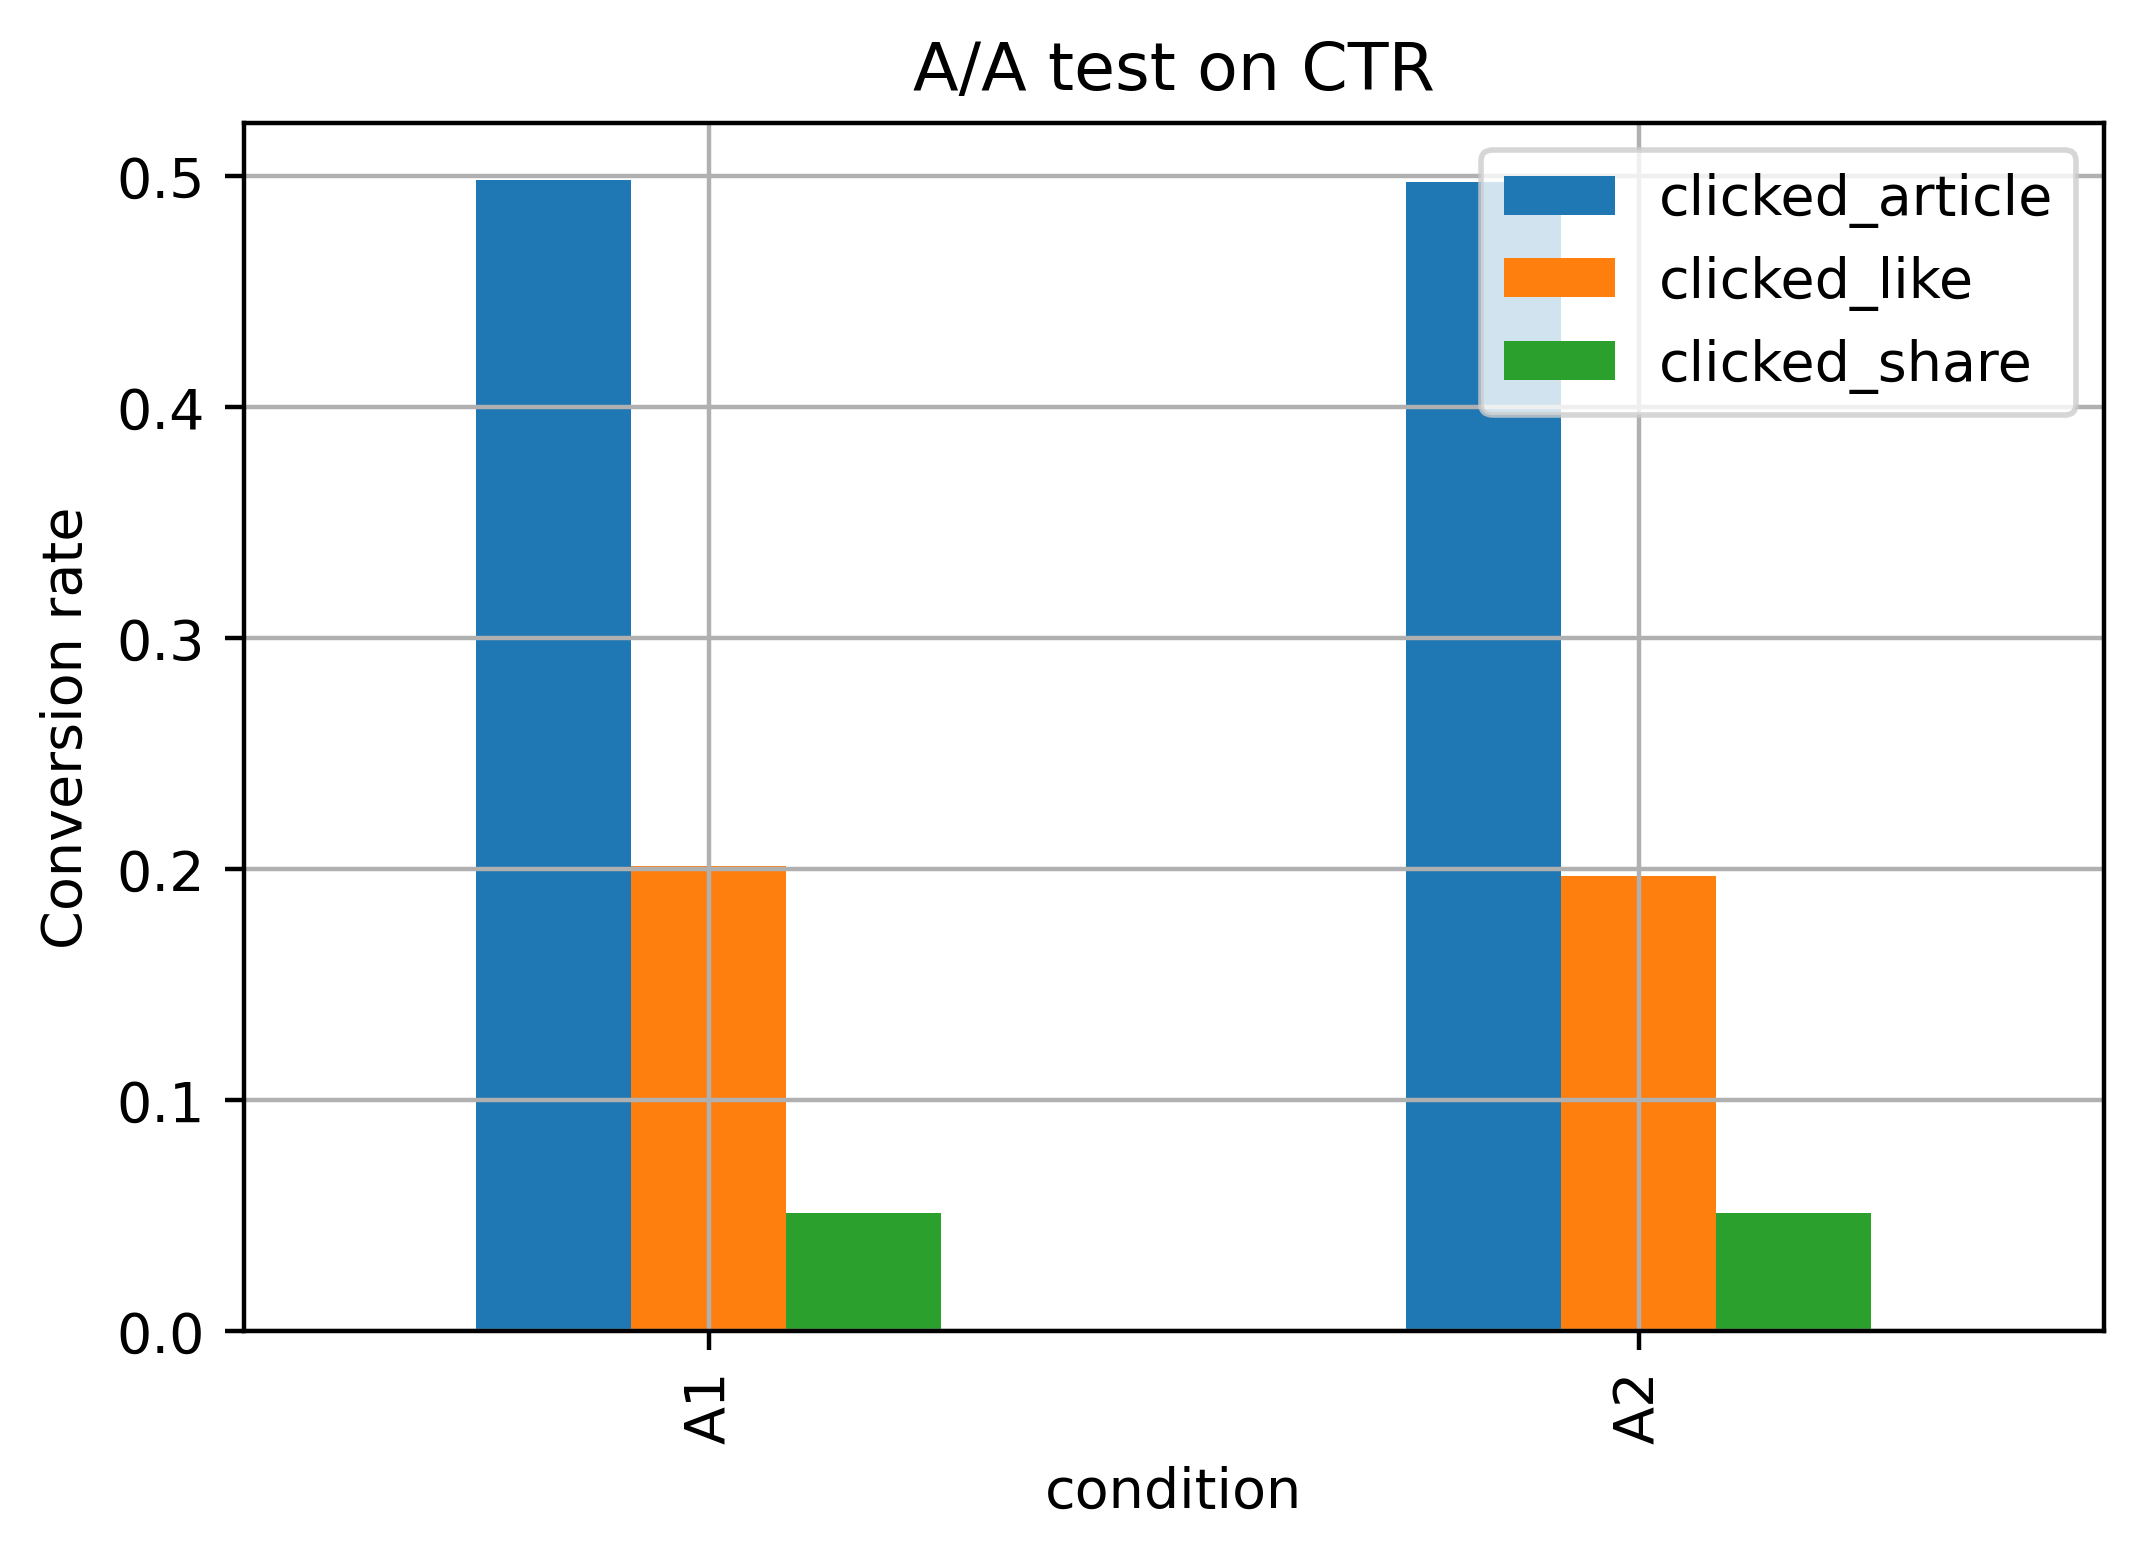

In [9]:
viz_website_2018_01_sum.plot(kind='bar')
plt.ylabel('Conversion rate')
plt.title('A/A test on CTR')
plt.grid(True)
plt.show();

In [10]:
control_df = df[df['condition'] == 'A1']
test_df = df[df['condition'] == 'A2']

control = control_df['clicked_like']
test = test_df['clicked_like']

In [11]:
from scipy import stats
results = stats.ttest_ind(control, test)
p_value = results[1]
print("The p value is " + str(p_value))

The p value is 0.3625133893514345


In [27]:
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/641637adb6bb68e783df75895922dc5922ce8cae/data_viz_website_2018_02.csv'
df = pd.read_csv(link, parse_dates=['visit_date'])

In [28]:
df.head()

,visit_date,condition,time_spent_homepage_sec,clicked_article,clicked_like,clicked_share,article_published
0,2018-02-01,tips,58.122134,1,0,0,no
1,2018-02-01,tips,61.358279,1,0,0,no
2,2018-02-01,tips,59.751284,0,1,0,no
3,2018-02-01,tips,59.622363,1,0,0,no
4,2018-02-01,tips,60.730643,0,0,0,no


In [29]:
import datetime as dt
df['Week'] = df['visit_date'].dt.week


C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [30]:
week_condition = pd.DataFrame(df.groupby(['Week', 'condition'])['clicked_like'].mean())

In [31]:
week_condition = week_condition.unstack(level=1)

In [32]:
week_condition.head()

clicked_like          
condition         tips     tools
Week                            
5             0.109036  0.015570
6             0.124110  0.023761
7             0.114648  0.049217
8             0.124168  0.109924
9             0.113924  0.146558

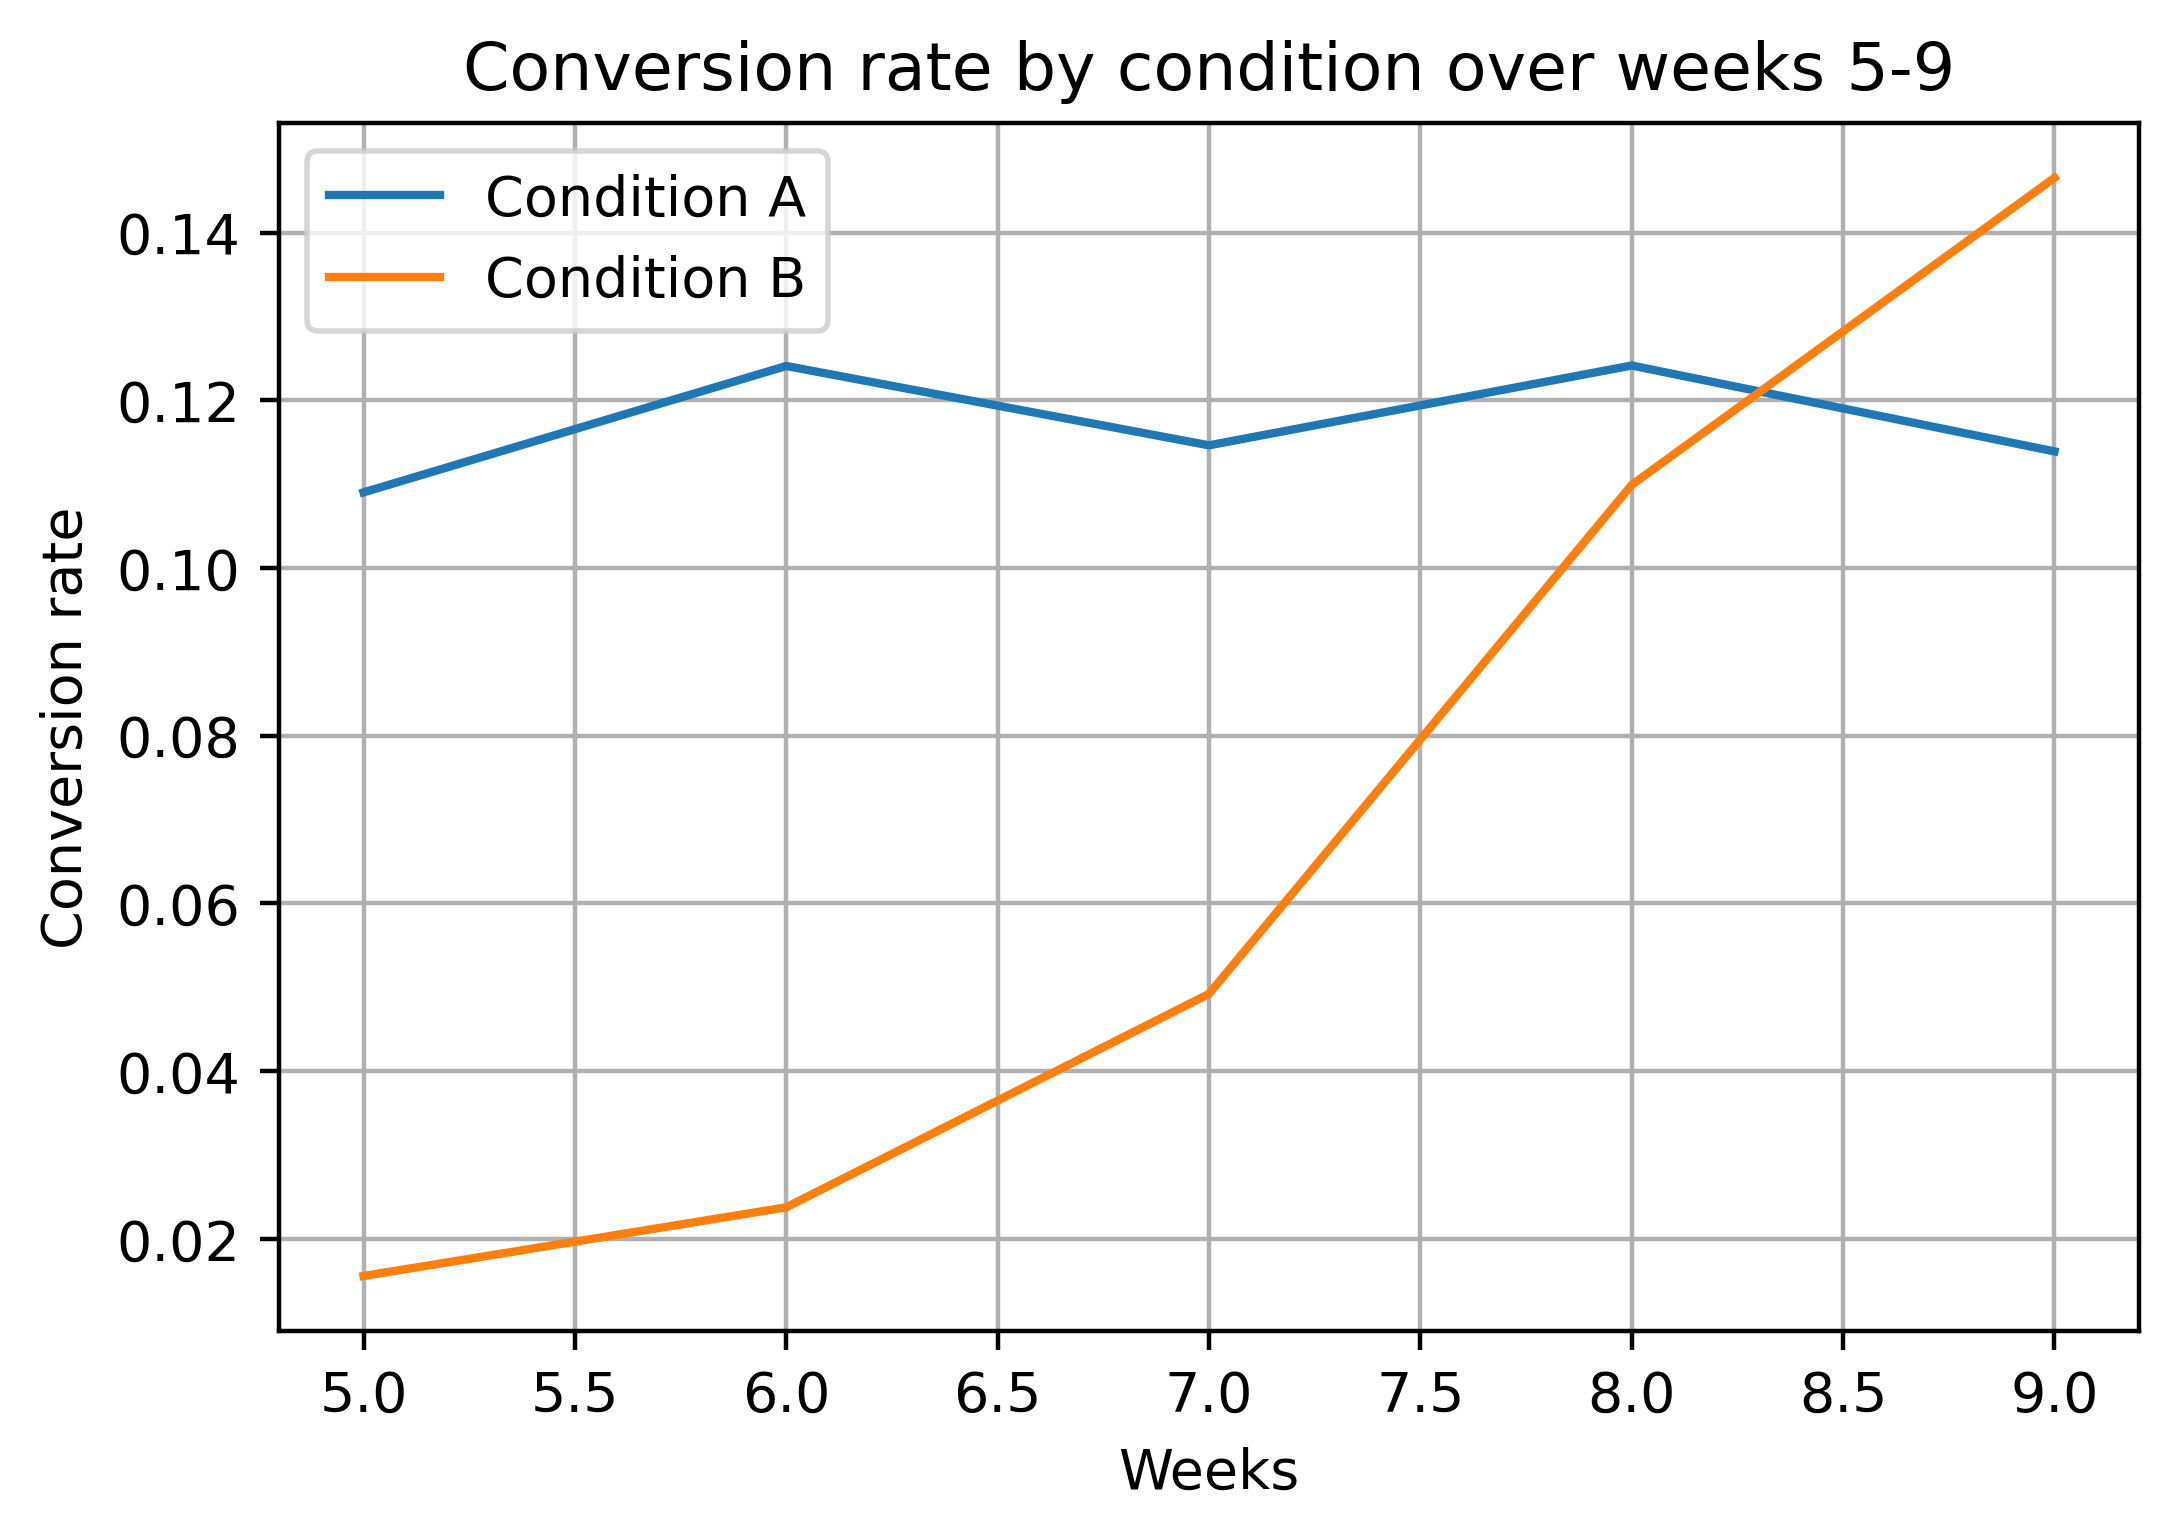

In [33]:
week_condition.plot()
plt.ylabel('Conversion rate')
plt.ylabel('Conversion rate')
plt.xlabel('Weeks')
plt.grid(True)
plt.title('Conversion rate by condition over weeks 5-9')
plt.legend(labels=['Condition A', 'Condition B'])
#plt.tick_params(labelbottom=False)    
plt.show()

In [34]:
viz_website_2018_02_sum = df[['visit_date', 'condition', 'article_published', 'clicked_like']]

In [35]:
groupby_condition = viz_website_2018_02_sum.groupby(['visit_date','condition'])['clicked_like'].mean()
groupby_condition_df = pd.DataFrame(groupby_condition)
groupby_condition_df_flat = groupby_condition_df.unstack(level=1)
groupby_condition_df_flat.tail()

clicked_like          
condition          tips     tools
visit_date                       
2018-02-24     0.133595  0.137712
2018-02-25     0.108384  0.130841
2018-02-26     0.134981  0.173116
2018-02-27     0.112554  0.141026
2018-02-28     0.093567  0.125984

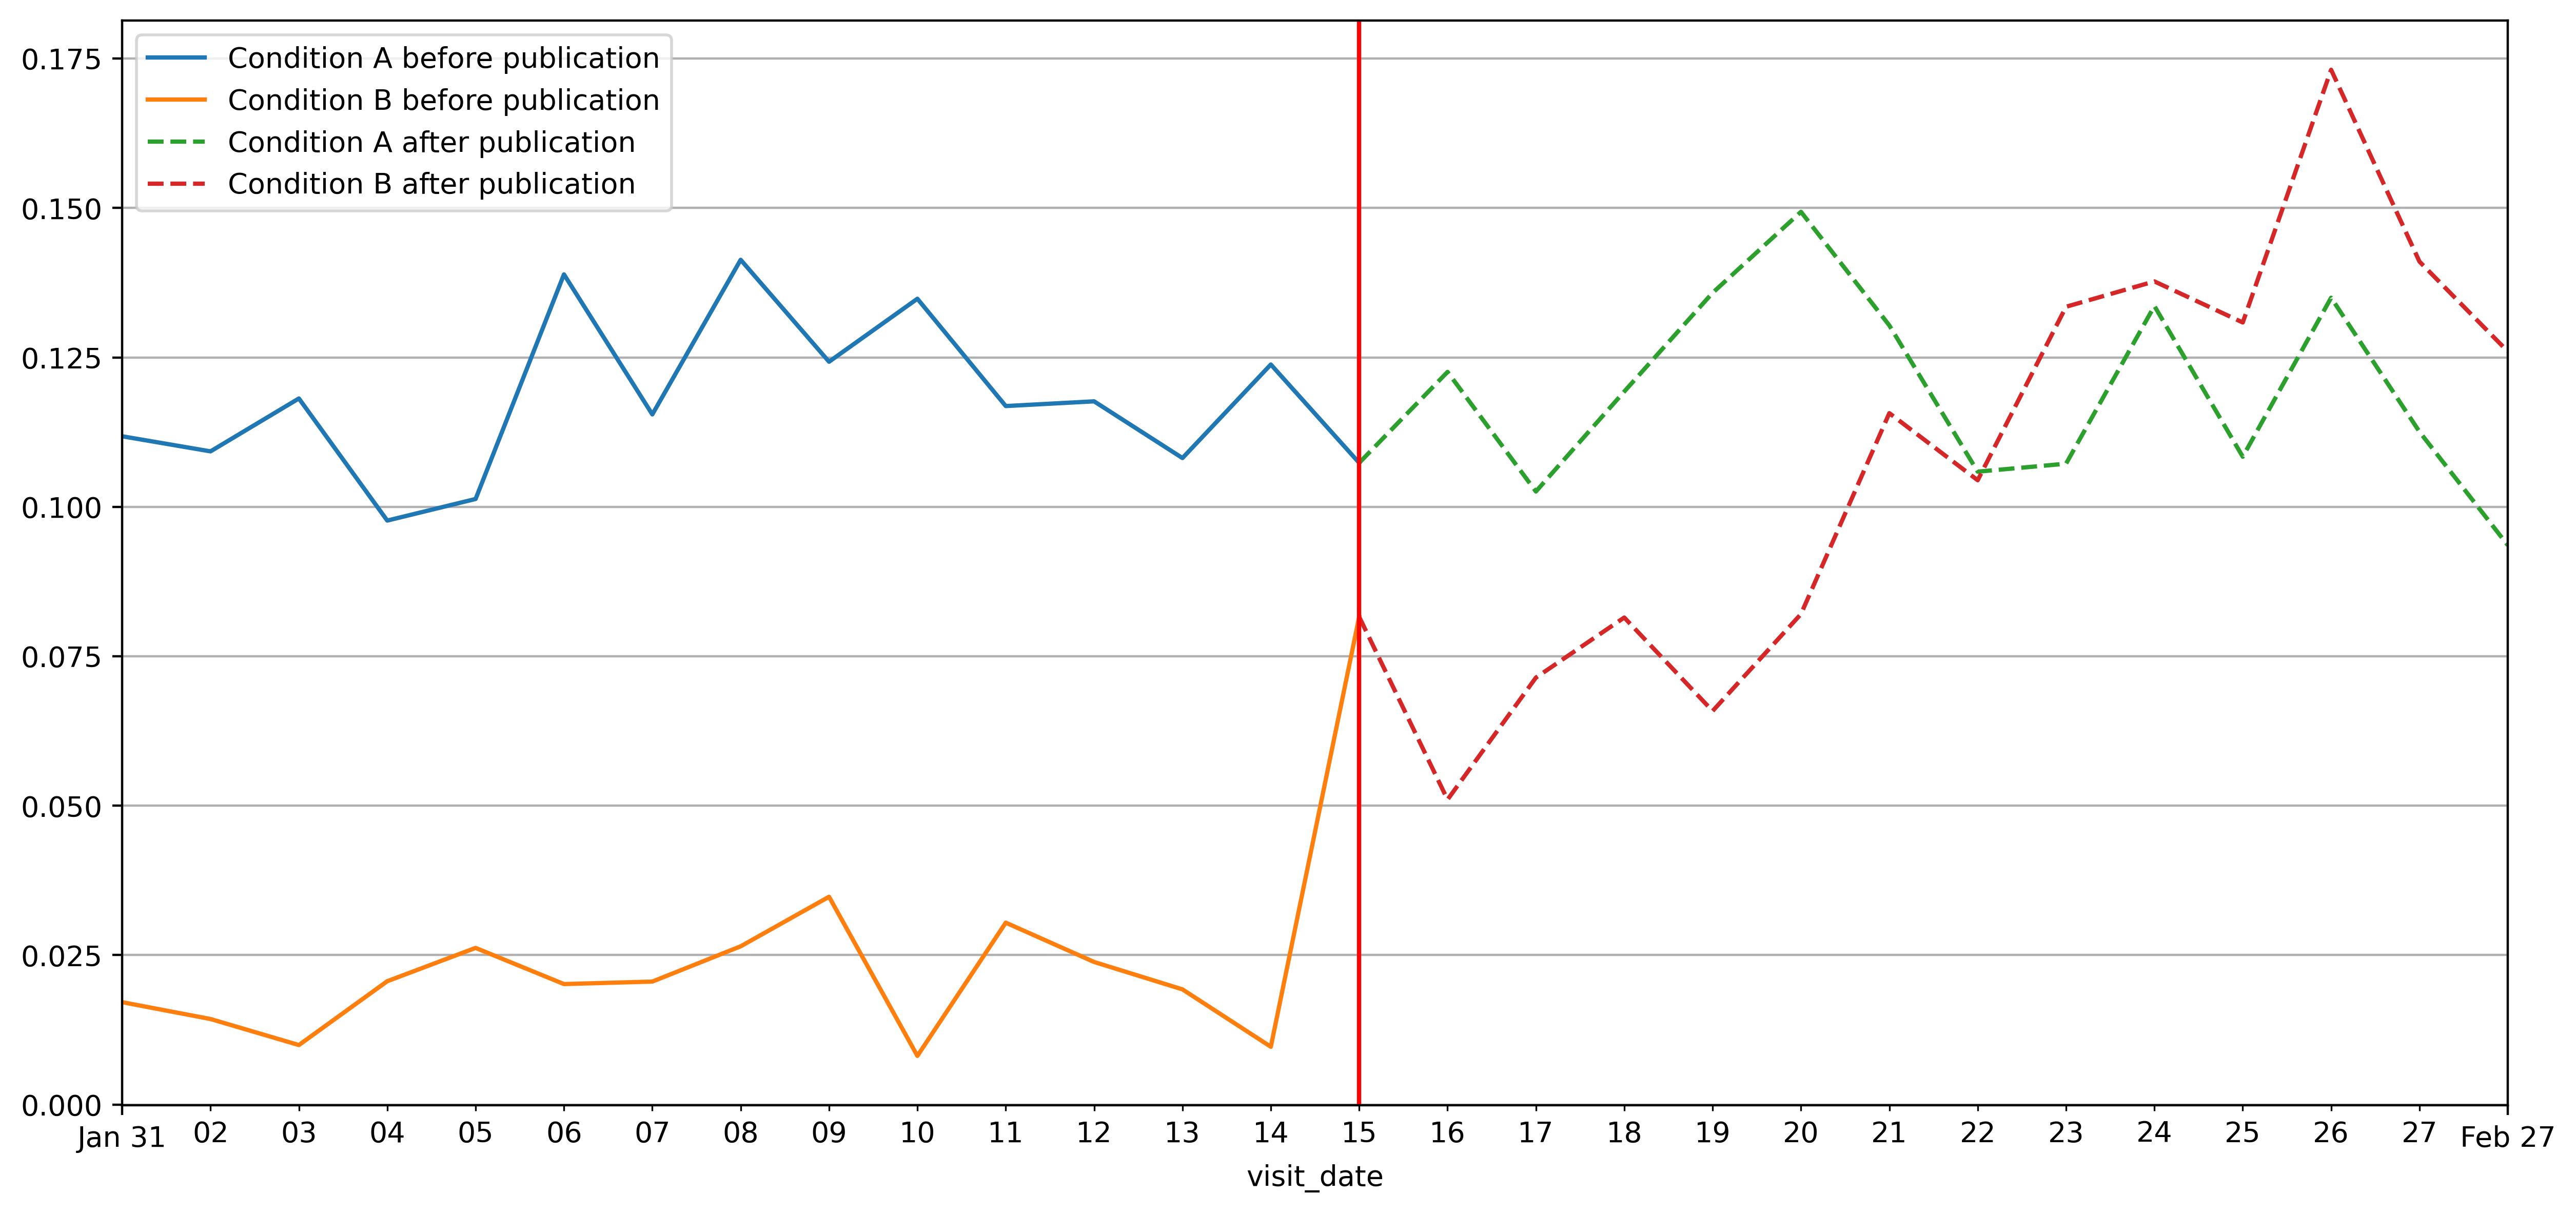

In [36]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,7))
before = groupby_condition_df_flat[:"2018-02-15"]
after = groupby_condition_df_flat["2018-02-15":]
#groupby_condition_df_flat.plot(ax=ax)
before.plot(ax=ax,  markersize=16)
after.plot(ax=ax,  linestyle='dashed',  markersize=16)
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlim(df['visit_date'].values[0], df['visit_date'].values[-1])
ax.axvline(pd.Timestamp("2018-02-15"), color='r')
ax.grid()
ax.legend(labels=['Condition A before publication', 'Condition B before publication',
                  'Condition A after publication', 'Condition B after publication'])

In [37]:
before.columns = before.columns.get_level_values(1)
after.columns = after.columns.get_level_values(1)

In [39]:
before.columns 

Index(['tips', 'tools'], dtype='object', name='condition')

In [41]:
control_before = before[['tips']]
test_before = before[['tools']]
control_after = after[['tips']]
test_after = after[['tools']]

In [43]:
from scipy import stats
results = stats.ttest_ind(control_before, test_before)
p_value = results[1]
print("The p value is " + str(p_value))

The p value is [5.29354532e-16]


In [44]:
from scipy import stats
results = stats.ttest_ind(control_after, test_after)
p_value = results[1]
print("The p value is " + str(p_value))

The p value is [0.25783751]


In [3]:
import pandas as pd
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/305fa09d591ed71847aaace2f3c6c3001aebcc69/data_viz_website_2018_03.csv'
df = pd.read_csv(link, parse_dates=['visit_date'])

In [4]:
df.head()

,visit_date,condition,time_spent_homepage_sec,clicked_article,clicked_like,clicked_share,pageload_time
0,2018-03-01,tips,71.171122,1,0,0,4.778857
1,2018-03-01,tips,69.928055,1,0,0,5.411389
2,2018-03-01,tips,72.072114,1,0,0,5.070054
3,2018-03-01,tips,70.191929,1,0,0,5.846337
4,2018-03-01,tips,69.443729,1,0,0,4.906941


In [5]:
grouped_df = pd.DataFrame(df.groupby(['visit_date','condition'])['clicked_like', 'pageload_time'].mean())
#grouped_df = grouped_df.unstack(level=1)
grouped_df.head()

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


clicked_like  pageload_time
visit_date condition                             
2018-03-01 tips           0.146138       4.978413
           tools          0.054264       6.990646
2018-03-02 tips           0.151394       5.006853
           tools          0.051383       6.995900
2018-03-03 tips           0.136268       5.009049

In [6]:
grouped_df.reset_index(inplace=True)  

In [7]:
grouped_df.head()

,visit_date,condition,clicked_like,pageload_time
0,2018-03-01,tips,0.146138,4.978413
1,2018-03-01,tools,0.054264,6.990646
2,2018-03-02,tips,0.151394,5.006853
3,2018-03-02,tools,0.051383,6.995900
4,2018-03-03,tips,0.136268,5.009049


In [8]:
# grouped_df.condition.value_counts()
# grouped_df.plot.scatter(x='pageload_time',y='clicked_like', label='condition')

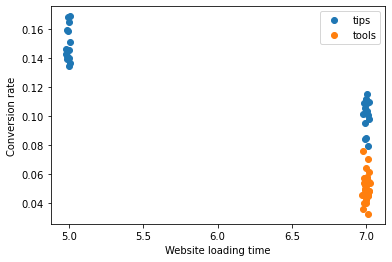

In [10]:
import matplotlib.pyplot as plt
groups = grouped_df.groupby("condition")
for name, group in groups:
    plt.plot(group["pageload_time"], group["clicked_like"], marker="o", linestyle="", label=name)
plt.xlabel('Website loading time')
plt.ylabel('Conversion rate')
plt.legend();

In [80]:
# %matplotlib inline
# import plotnine as p9

# print(p9.ggplot(grouped_df, p9.aes(x='pageload_time', y='clicked_like', color = 'condition')) +
#   p9.geom_point());

In [109]:
# import seaborn

# seaborn.set(style='ticks')
# fg = seaborn.FacetGrid(data=grouped_df, hue='condition', size=6,aspect=1.61)#, hue_order=_genders, aspect=1.61)
# fg.map(plt.scatter, 'pageload_time', 'clicked_like').add_legend()

In [119]:
grouped_df = pd.DataFrame(df.groupby(['visit_date','condition'])['clicked_like'].mean())
#grouped_df = grouped_df.unstack(level=1)
grouped_df_flat = grouped_df.unstack(level=1)

In [120]:
grouped_df_flat.head()

clicked_like          
condition          tips     tools
visit_date                       
2018-03-01     0.146138  0.054264
2018-03-02     0.151394  0.051383
2018-03-03     0.136268  0.048000
2018-03-04     0.168932  0.056863
2018-03-05     0.143133  0.057569